#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

<function matplotlib.pyplot.show(*args, **kw)>

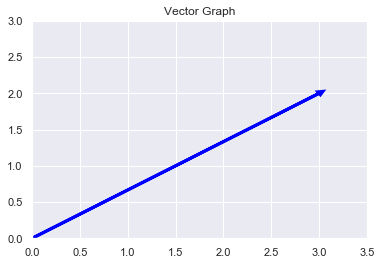

In [178]:
import math
import matplotlib.pyplot as plt 
import numpy as np

# Axis Bounds
plt.xlim(0, 3.5)          
plt.ylim(0, 3.0)

A = np.array([3, 2])
plt.arrow(0,0, A[0], A[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("Vector Graph")
plt.show

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [179]:
B =np.array([17, -4, -2, 1])
print(np.linalg.norm(B))

17.60681686165901


It shows the length of the vector

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [180]:
C = [3, 7, -2, 12]
D = [9, -7, 4, 6]
np.dot(C,D)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [181]:
E = np.matrix('7, 4, 2; 1, 3, -1; 2, 6, -4')
print(np.linalg.inv(E))
print
print(np.transpose(E))

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [182]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [183]:
def mean_variance_stddev(data):
  
    data = data

    # calc the mean
    summed = 0 

    for value in data:
      summed = summed + value

    data_len = len(data)
    mean = summed / data_len
    print('Mean of the dataset is', mean)    

    # calc the variance
    var = []

    mean = mean
    
    for value in data:
      value_subtract_mean = value - mean
      squared_value = value_subtract_mean**2
      var.append(squared_value)

    var_len = len(var)
    var_summed = 0

    for value in var:
      var_summed = var_summed + value

    variance = var_summed / var_len
    print('Variance of the dataset is', variance)

    stddev = variance**.5
    print('Standard Deviation for the dataset is', stddev )
    
  
 
customers_1 = mean_variance_stddev(customers)
print(customers_1)

Mean of the dataset is 1135.7142857142858
Variance of the dataset is 84653.06122448981
Standard Deviation for the dataset is 290.95199127087926
None


In [184]:
snow_1 = mean_variance_stddev(snow)
print(snow_1)

Mean of the dataset is 2.7142857142857144
Variance of the dataset is 7.346938775510203
Standard Deviation for the dataset is 2.7105237087157534
None


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

The variance of the customers could relate to the variance of the snow in that the more snow, the more customers. Other than that, they are two very different things and their variances don't relate to each other. They relate to their own mean.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [185]:
def covariance(x, y):
  
  means = []
  
  
  def mean_variance_stddev(data):
  
    data = data

    # calc the mean
    summed = 0 

    for value in data:
      summed = summed + value

    data_len = len(data)
    mean = summed / data_len
    print('Mean of the dataset is', mean)    

    # calc the variance
    var = []

    mean = mean
    means.append(mean)
    
    for value in data:
      value_subtract_mean = value - mean
      squared_value = value_subtract_mean**2
      var.append(squared_value)

    var_len = len(var)
    var_summed = 0

    for value in var:
      var_summed = var_summed + value

    variance = var_summed / var_len
    print('Variance of the dataset is', variance)

    stddev = variance**.5
    print('Standard Deviation for the dataset is', stddev )
  
  
  
  print('\n')
  x = x
  mean_variance_stddev(x)
  print('\n')
  y = y
  mean_variance_stddev(y)
  
  # create x minus mu and y minus v values
  
  x_values = []
  
  for value in x:
    x_minus_mu = value - means[0]
    x_values.append(x_minus_mu)
  
  y_values = []
  
  for value in y:
    y_minus_v = value - means[1]
    y_values.append(y_minus_v)
    
  # multiply x_values by y_values
  
  xy_sum = []
  
  if len(x_values) == len(y_values):
    length = 0
    
    for value in x_values:
      
      x_by_y = x_values[length] * y_values[length]
      xy_sum.append(x_by_y)
      length +=1

  # add together all the multiplied xy values
  
  xy_total = 0
  
  for value in xy_sum:
    xy_total = xy_total + value
 
   
  population_length = len(x_values)
  covariance_final = xy_total / population_length
  
  print('\nThe covariance of x and y datasets is:', covariance_final )
    
  
 
covariance(customers, snow)



Mean of the dataset is 1135.7142857142858
Variance of the dataset is 84653.06122448981
Standard Deviation for the dataset is 290.95199127087926


Mean of the dataset is 2.7142857142857144
Variance of the dataset is 7.346938775510203
Standard Deviation for the dataset is 2.7105237087157534

The covariance of x and y datasets is: 574.4897959183673


In [186]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [187]:
# Let me get you some data to start you off.
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
import math

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [188]:
# prin_comp <- prcomp(pca.X, scale. = T)
# names(prin_comp)


In [189]:
# Only numeric columns in dataframe for passing to PCA
X = df.drop('Country', axis=1)
X.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [190]:
print(X.columns.values)

['Cheese' 'Carcass_Meat' 'Other_Meat' 'Fish' 'Fats_and_Oils' 'Sugars'
 'Fresh_Potatoes' 'Fresh_Veg' 'Other_Veg' 'Processed_Potatoes'
 'Processed_Veg' 'Fresh_Fruit' 'Cereals' 'Beverages' 'Soft_Drinks'
 'Alcoholic Drinks' 'Confectionery']


In [212]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

print("\n Projected Data: \n", B)

original shape:    (4, 17)
transformed shape: (4, 4)

 Eigenvectors: 
 [[-5.69553798e-02  4.79276281e-02 -2.58916658e-01 -8.44149825e-02
  -5.19362266e-03 -3.76209828e-02  4.01402060e-01 -1.51849942e-01
  -2.43593729e-01 -2.68862325e-02 -3.64882691e-02 -6.32640898e-01
  -4.77028584e-02 -2.61877559e-02  2.32244140e-01 -4.63968168e-01
  -2.96502011e-02]
 [ 1.60128504e-02  1.39158234e-02 -1.53311385e-02 -5.07549472e-02
  -9.53886561e-02 -4.30216989e-02 -7.15017078e-01 -1.44900268e-01
  -2.25450923e-01  4.28507606e-02 -4.54518025e-02 -1.77740743e-01
  -2.12599678e-01 -3.05605417e-02  5.55124311e-01  1.13536523e-01
   5.94992076e-03]
 [ 2.39429493e-02  6.36711149e-02 -5.53848544e-01  3.90648062e-02
  -1.25222570e-01 -3.60574536e-02 -2.06682480e-01  2.13822365e-01
  -5.33284101e-02 -7.36490153e-02  5.28919094e-02  4.00128646e-01
  -3.58849213e-01 -4.13585964e-02 -1.69426484e-01 -4.98583202e-01
  -5.23216429e-02]
 [ 8.25380517e-01  3.77634432e-01 -1.07034917e-01  3.64146859e-04
  -3.12646693e

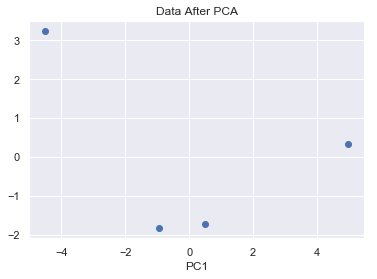

In [231]:
x =[-0.95448984, -4.52095094, 0.48797835, 4.98746242]
y = [-1.8266106 , 3.23367195 ,-1.73537967, 0.32831832]
data = {"x": x, "y": y}
X_df = pd.DataFrame(data)
plt.scatter(X_df['x'], X_df['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.show()

In [191]:
normalized =(X - X.mean()/X.std())
print(normalized)

       Cheese  Carcass_Meat  Other_Meat       Fish  Fats_and_Oils      Sugars  \
0  100.001834    230.136364  677.443325  142.58493     183.823235  146.034551   
1   98.001834    212.136364  795.443325  155.58493     225.823235  165.034551   
2   98.001834    227.136364  742.443325  117.58493     174.823235  137.034551   
3   61.001834    252.136364  578.443325   88.58493     199.823235  129.034551   

   Fresh_Potatoes   Fresh_Veg   Other_Veg  Processed_Potatoes  Processed_Veg  \
0      716.023777  249.544196  483.049808          183.293688     337.868205   
1      870.023777  261.544196  565.049808          188.293688     342.868205   
2      562.023777  167.544196  413.049808          205.293688     314.868205   
3     1029.023777  139.544196  350.049808          172.293688     311.868205   

   Fresh_Fruit      Cereals  Beverages  Soft_Drinks  Alcoholic Drinks  \
0  1097.406258  1444.511667  51.829393  1363.851574        372.698019   
1  1132.406258  1554.511667  67.829393  1245.85

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(normalized)
food = scaler.transform(normalized)
print(food)

[[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]


In [217]:
from sklearn.decomposition import PCA

# create the PCA instance
pca = PCA(n_components=2)
# fit on data
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

print("\n Projected Data: \n", B)

original shape:    (4, 17)
transformed shape: (4, 2)

 Eigenvectors: 
 [[-0.05695538  0.04792763 -0.25891666 -0.08441498 -0.00519362 -0.03762098
   0.40140206 -0.15184994 -0.24359373 -0.02688623 -0.03648827 -0.6326409
  -0.04770286 -0.02618776  0.23224414 -0.46396817 -0.0296502 ]
 [ 0.01601285  0.01391582 -0.01533114 -0.05075495 -0.09538866 -0.0430217
  -0.71501708 -0.14490027 -0.22545092  0.04285076 -0.0454518  -0.17774074
  -0.21259968 -0.03056054  0.55512431  0.11353652  0.00594992]]

 Eigenvalues: 
 [105073.34576714  45261.62487597]

 Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


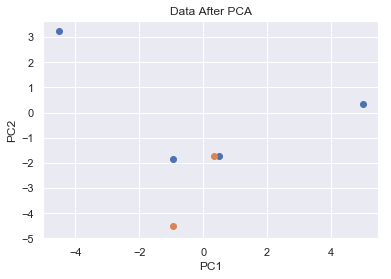

In [232]:
x = B[0]
y = B[1]
data = {"x": x, "y": y}

X_pca = pd.DataFrame(data)
plt.scatter(X_df['x'], X_df['y'])
plt.scatter(X_pca['x'], X_pca['y'])
plt.title("Data After PCA")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [219]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


Text(0.5, 1.0, 'Elbow Method for determining K clusters in K Means for Sprint Challenge')

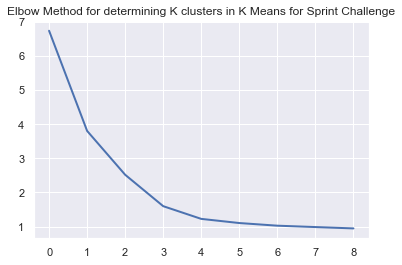

In [220]:
from scipy import cluster

initial = [cluster.vq.kmeans(points, i) for i in range(1,10)]

plt.plot([var for (cent,var) in initial], linewidth=2)
plt.title('Elbow Method for determining K clusters in K Means for Sprint Challenge')

In [221]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
kmeans.fit(points_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[-4.3300564   2.06918898]
 [ 5.86871948 -4.9274035 ]
 [10.60952525  3.70831033]
 [-3.22564787 -5.11387915]]


[-4.3300564   5.86871948 10.60952525 -3.22564787]


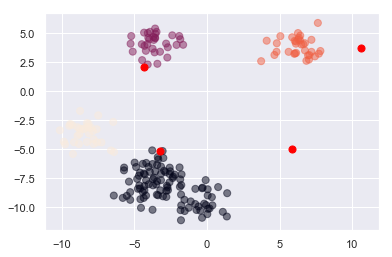

In [222]:
plt.scatter(points['x'],points['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5,)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
print(centroids[:, 0])